In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import networkx as nx
from scipy.stats import ttest_ind
from tqdm.notebook import tqdm_notebook
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import gc


In [2]:
cc = pd.read_csv("../data/creditcard.csv")

In [14]:
df_2 = pd.DataFrame(index=range(len(cc)),columns=range(0))
df_3 = pd.DataFrame(index=range(len(cc)),columns=range(0))

for t in tqdm_notebook(range(0,48)):

    g_part= nx.read_gpickle("../data/pickles2/myGraph" + str(t) + ".gpickle")

    g_degree = g_part.in_degree
    g_degree_cent = nx.in_degree_centrality(g_part)

    in_degrees = []
    degree_central = []
    for node in g_part:
        in_degrees.append(g_degree[node])
        degree_central.append(g_degree_cent[node])


    df_2.loc[:,t] = pd.Series(in_degrees)
    df_3.loc[:,t] = pd.Series(degree_central)

    del g_part
    del g_degree
    del g_degree_cent
    del in_degrees
    del degree_central
    gc.collect()

  0%|          | 0/5 [00:00<?, ?it/s]

In [5]:
df_2['class'] = cc['Class']
df_3['class'] = cc['Class']

df_2.to_csv('../data/df_indegrees_hnsw.csv')
df_3.to_csv('../data/df_centrality_hnsw.csv')

In [4]:
df = pd.read_csv('../data/df_indegrees_hnsw.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,class
0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,91.0,125.0,163.0,...,280.0,281.0,282.0,282.0,283.0,284.0,285.0,285.0,287,0
1,45.0,45.0,45.0,45.0,45.0,45.0,45.0,63.0,91.0,122.0,...,215.0,216.0,216.0,216.0,216.0,216.0,216.0,216.0,216,0
2,63.0,63.0,63.0,63.0,63.0,63.0,63.0,78.0,93.0,126.0,...,193.0,193.0,193.0,193.0,193.0,194.0,195.0,195.0,196,0
3,80.0,80.0,80.0,80.0,80.0,80.0,80.0,107.0,141.0,186.0,...,289.0,289.0,289.0,289.0,290.0,290.0,290.0,290.0,290,0
4,59.0,59.0,59.0,59.0,59.0,59.0,59.0,86.0,103.0,135.0,...,274.0,276.0,276.0,277.0,280.0,281.0,283.0,286.0,289,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
284803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
284804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
284805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0


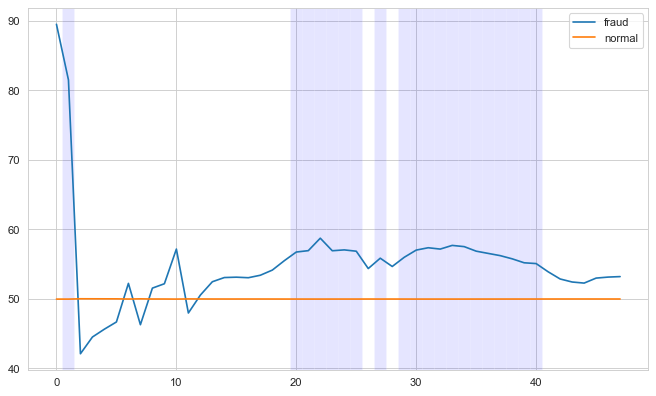

In [27]:

indegree_norm_avg = []
indegree_fraud_avg = []

for t in range(0, 48):
    temp   = df[[str(t),'class']].groupby(by='class').mean()
    indegree_norm_avg.append(temp.iloc[0,0])
    indegree_fraud_avg.append(temp.iloc[1,0])




from scipy.stats import ttest_ind
tests_degrees = []
tests_pagerank = []
df_indegree_fraud = df[df['class'] == 1]
df_indegree_norm = df[df['class'] == 0]
for t in range(0,48):
    tests_pagerank.append(ttest_ind(df_indegree_fraud.iloc[:,t], df_indegree_norm.iloc[:,t], nan_policy='omit'))



from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(10, 6), dpi=80)

plt.plot(indegree_fraud_avg, label = 'fraud')
plt.plot(indegree_norm_avg, label = 'normal')
plt.legend()
for t in range(0,48):
    if tests_pagerank[t][1] < 0.05:
        plt.axvspan(t-0.5, t+0.5, facecolor='b', alpha=0.1)
# for t in range(1,28):
#     if tests_pagerank[t][1] < 0.05:
#         plt.vlines(t, 0, max(pagerank_norm_avg),colors='green', ls=':', lw=10)


In [29]:
df

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,class
0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,91.0,125.0,163.0,...,280.0,281.0,282.0,282.0,283.0,284.0,285.0,285.0,287,0
1,45.0,45.0,45.0,45.0,45.0,45.0,45.0,63.0,91.0,122.0,...,215.0,216.0,216.0,216.0,216.0,216.0,216.0,216.0,216,0
2,63.0,63.0,63.0,63.0,63.0,63.0,63.0,78.0,93.0,126.0,...,193.0,193.0,193.0,193.0,193.0,194.0,195.0,195.0,196,0
3,80.0,80.0,80.0,80.0,80.0,80.0,80.0,107.0,141.0,186.0,...,289.0,289.0,289.0,289.0,290.0,290.0,290.0,290.0,290,0
4,59.0,59.0,59.0,59.0,59.0,59.0,59.0,86.0,103.0,135.0,...,274.0,276.0,276.0,277.0,280.0,281.0,283.0,286.0,289,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
284803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
284804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
284805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0


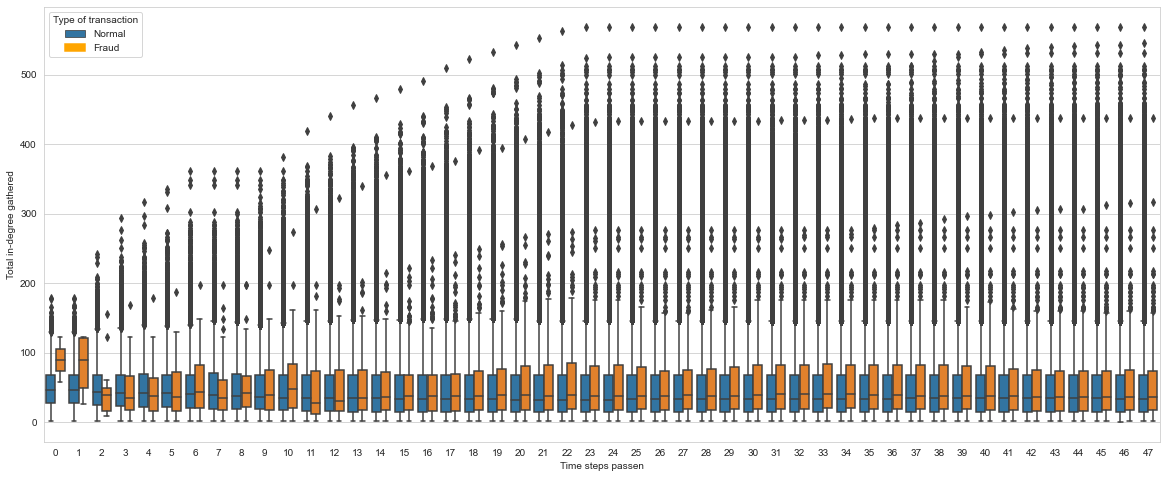

In [18]:
df_long = pd.melt(df, "class")
from matplotlib import rcParams
import matplotlib.pyplot as plt

rcParams['figure.figsize'] = 20,8
ax = sns.boxplot(x="variable", hue="class", y="value", data=df_long)
plt.legend(labels=["Normal","Fraud"], title="Type of transaction", fancybox=True)
ax.set(xlabel='Time steps passen', ylabel='Total in-degree gathered')

leg = ax.get_legend()
leg.legendHandles[1].set_color('orange')

In [52]:
df_degrees_fraud = df[df['class'] == 1]
df_degrees_norm = df[df['class'] == 0]

tests_degrees = []

for t in range(0,48):
    tests_degrees.append(ttest_ind(df_degrees_fraud.iloc[:,t], df_degrees_norm.iloc[:,t], nan_policy='omit'))


In [53]:
indegree_norm_avg = []
indegree_fraud_avg = []

for t in range(0, 48):
    temp   = df[[str(t),'class']].groupby(by='class').mean()
    indegree_norm_avg.append(temp.iloc[0,0])
    indegree_fraud_avg.append(temp.iloc[1,0])

In [65]:
diffs_df = pd.DataFrame()
diffs_df
for t in range(0, 48):
    if t == 0:
        diffs_df[str(t)] =  df[str(t)]
    if t >0:
        diffs_df[str(t)] = df[str(t)].sub(df[str(tm - 1)], fill_value=0)
diffs_df['class'] = cc.Class

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,34.0,38.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0
1,45.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,28.0,31.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,63.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,15.0,33.0,...,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,80.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,34.0,45.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,59.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,17.0,32.0,...,2.0,4.0,2.0,0.0,1.0,3.0,1.0,2.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
284803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
284804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
284805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


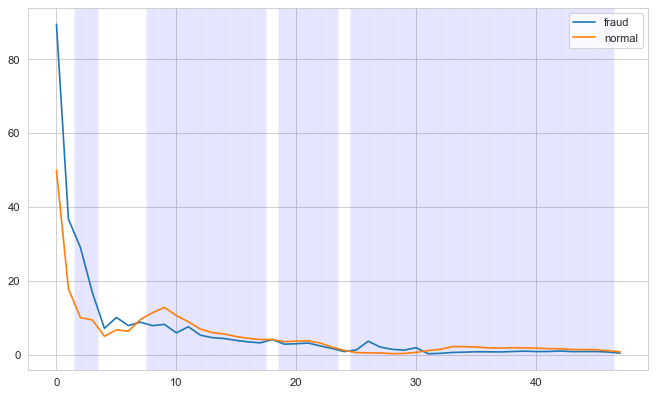

In [66]:


indegree_norm_avg = []
indegree_fraud_avg = []

for t in range(0, 48):
    temp   = diffs_df[[str(t),'class']].groupby(by='class').mean()
    indegree_norm_avg.append(temp.iloc[0,0])
    indegree_fraud_avg.append(temp.iloc[1,0])




from scipy.stats import ttest_ind
tests_degrees = []
tests_pagerank = []
df_indegree_fraud = diffs_df[diffs_df['class'] == 1]
df_indegree_norm = diffs_df[diffs_df['class'] == 0]
for t in range(0,48):
    tests_pagerank.append(ttest_ind(df_indegree_fraud.iloc[:,t], df_indegree_norm.iloc[:,t], nan_policy='omit'))



from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(10, 6), dpi=80)

plt.plot(indegree_fraud_avg, label = 'fraud')
plt.plot(indegree_norm_avg, label = 'normal')
plt.legend()
for t in range(0,47):
    if tests_pagerank[t][1] < 0.05:
        plt.axvspan(t-0.5, t+0.5, facecolor='b', alpha=0.1)
# for t in range(1,28):
#     if tests_pagerank[t][1] < 0.05:
#         plt.vlines(t, 0, max(pagerank_norm_avg),colors='green', ls=':', lw=10)


In [5]:
cc.Time = np.floor(cc['Time'] / (60*60))


In [6]:
df['totalpersteps'] = df['47'] / (48 - cc['Time'])

In [7]:
df_indegree_fraud = df[df['class'] == 1]
df_indegree_norm = df[df['class'] == 0]

In [17]:
ttest_ind(df_indegree_fraud.totalpersteps, df_indegree_norm.totalpersteps, nan_policy='omit')

Ttest_indResult(statistic=-3.3426140479877784, pvalue=0.0008300392468323993)

In [14]:
print(df_indegree_fraud.totalpersteps.mean())
print(df_indegree_fraud.totalpersteps.std())


2.345391555322337
2.131272122901824


In [16]:
print(df_indegree_norm.totalpersteps.mean())
print(df_indegree_norm.totalpersteps.std())

2.7154492826853436
2.454044147248488


In [97]:
credittest = pd.read_csv('../data/creditcard.csv')
credittest['totalperstep'] = df.totalpersteps
credittest.to_csv('../data/creditcard_test.csv', index=False)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,totalperstep
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,5.979167
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,4.500000
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,4.083333
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,6.041667
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,6.020833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,1.000000
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,1.000000
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,1.000000
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,1.000000
